In [1]:
import json

from enbios.bw2.util import report

report()

Project: default
[]
Project: ecoinvent_391
['biosphere3', 'ecoinvent_391_cutoff']
Project: Spain case study
['biosphere', 'food']
Project: supply chain graph
['bike']
Project: matrix-test
['db']
Project: nonlinear-method-test
['db']
Project: ecoinvent_391_apos
['biosphere3', 'ecoinvent_391_apos']
Project: 1
[]
Project: ecoinvent_391_consequential
['biosphere3', 'ecoinvent_391_consequential']
Project: super_simple_builder_test
['db']
Project: builder_test
['db']
Project: ppp
['db']
Project: 
[]
Project: seed_import
['biosphere3', 'ecoi39co', 'batteries', 'PV', 'cobalt']
Project: bw_temporalis example
['example']
Project: lci-model
[]
Project: test-del
['db']
Project: lci_model
['biosphere3', 'cutoff391', 'new_db']
Project: LIVENreg_ei_391_con
['biosphere3', 'ei391cutoff']


In [2]:
BRIGHTWAY_PROJECT = "ecoinvent_391"

In [3]:
experiment_data = json.load(open("data/uncertainty_experiment_data.json"))
# set the bw project to one that has ecoinvent 3.9.1 datasets
experiment_data["adapters"][0]["config"]["bw_project"] = BRIGHTWAY_PROJECT
# samples of the k-distributions:
experiment_data["adapters"][0]["config"]["use_k_bw_distributions"] = 5

In [4]:
from enbios.base.experiment import Experiment

exp = Experiment(experiment_data)
exp

Experiment: (call info() for details)
Structural nodes: 6
Methods: 2
Hierarchy (depth): 4
Scenarios: 1

In [5]:
result = exp.run()

2024-04-24 12:37:09,579 - ............demos.enbios.base - INFO - Running scenario '0'
2024-04-24 12:37:09,583 - ............demos.(brightway-adapter) - INFO - Brightway adapter: Run distribution 1/5
2024-04-24 12:38:11,046 - ............demos.(brightway-adapter) - INFO - Brightway adapter: Run distribution 2/5
2024-04-24 12:39:12,901 - ............demos.(brightway-adapter) - INFO - Brightway adapter: Run distribution 3/5
2024-04-24 12:40:14,298 - ............demos.(brightway-adapter) - INFO - Brightway adapter: Run distribution 4/5
2024-04-24 12:41:13,768 - ............demos.(brightway-adapter) - INFO - Brightway adapter: Run distribution 5/5


In [6]:
import pickle

# store the experiment for later use
pickle.dump(exp, open("data/uncertainty_experiment.pickle", "wb"))

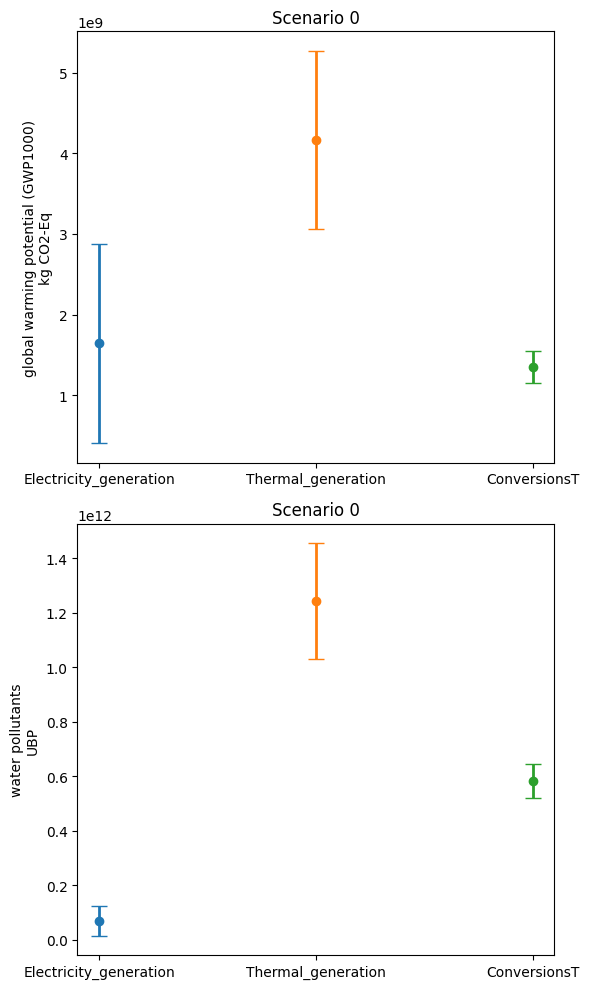

In [7]:
from enbios.base.plot_experiment import plot_multivalue_results

plot_multivalue_results(exp, level=2);

In [8]:
exp.results_to_csv("uncert.csv")